In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
data = pd.read_csv('https://query.data.world/s/zmh54hh4jcgnwpnxzpyr32wbtrlcid')
with pd.option_context("display.max_columns", None):
    display(data.head())

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,Ceo,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,C. Douglas McMillon,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,Warren E. Buffett,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,Timothy D. Cook,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,Darren W. Woods,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,415-983-8300,John H. Hammergren,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [3]:
data['Prftchange']  = [float(i.replace(',','')) for i in data['Prftchange']]
data['Net Expenses']  = data['Revenues'] - data['Profits']
data['Change in Revenue'] =100* data['Revenues']/1+ data['Revchange']
data['Change in Profits'] =100* data['Profits']/1+ data['Prftchange']
Quick_Ratio = list(data['Assets']/(data['Assets']-data['Totshequity']))
IQR_quartile = np.quantile(Quick_Ratio,.75) - np.quantile(Quick_Ratio,0.25)
upper_theshold =  np.median(Quick_Ratio) + 0.45*(IQR_quartile)
lower_theshold =  np.median(Quick_Ratio) - 0.45*(IQR_quartile)
investment_risk= []
for i in Quick_Ratio:
    if(i>upper_theshold):
        investment_risk.append(2)
    if(i<lower_theshold):
        investment_risk.append(0)
    if(i>lower_theshold and i<upper_theshold):
        investment_risk.append(1)
data['Financial Risk']  = investment_risk
    
#data['']

In [4]:
data.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_9220\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Rank,Employees,Hqzip,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Net Expenses,Change in Revenue,Change in Profits,Financial Risk
Rank,1.000000,-0.352640,0.029406,-0.606259,0.041253,-0.449531,0.025459,-0.303619,-0.409557,-0.594612,-0.606259,-0.449478,0.037734
Employees,-0.352640,1.000000,0.014257,0.720442,0.023912,0.342599,0.003843,0.126906,0.275214,0.727492,0.720442,0.342598,0.038721
Hqzip,0.029406,0.014257,1.000000,0.057828,-0.045263,0.017292,-0.039772,-0.110753,0.015284,0.059507,0.057828,0.017226,0.167965
Revenues,-0.606259,0.720442,0.057828,1.000000,-0.011962,0.600239,-0.014150,0.329844,0.546892,0.996190,1.000000,0.600201,0.023379
Revchange,0.041253,0.023912,-0.045263,-0.011962,1.000000,0.017903,-0.069335,-0.025431,-0.004524,-0.014651,-0.011956,0.017788,0.059444
Profits,-0.449531,0.342599,0.017292,0.600239,0.017903,1.000000,0.013838,0.512700,0.715928,0.528198,0.600239,0.999999,0.035846
Prftchange,0.025459,0.003843,-0.039772,-0.014150,-0.069335,0.013838,1.000000,-0.010567,-0.011559,-0.016531,-0.014151,0.015486,0.018669
Assets,-0.303619,0.126906,-0.110753,0.329844,-0.025431,0.512700,-0.010567,1.000000,0.637710,0.294271,0.329844,0.512670,-0.223364
Totshequity,-0.409557,0.275214,0.015284,0.546892,-0.004524,0.715928,-0.011559,0.637710,1.000000,0.502538,0.546892,0.715892,0.035539
Net Expenses,-0.594612,0.727492,0.059507,0.996190,-0.014651,0.528198,-0.016531,0.294271,0.502538,1.000000,0.996190,0.528158,0.020912


In [5]:
sectors = data.groupby('Sector')

sector name is Aerospace & Defense and number of entries is 12
sector name is Apparel and number of entries is 5
sector name is Business Services and number of entries is 20
sector name is Chemicals and number of entries is 14
sector name is Energy and number of entries is 57
sector name is Engineering & Construction and number of entries is 13
sector name is Financials and number of entries is 84
sector name is Food & Drug Stores and number of entries is 7
sector name is Food, Beverages & Tobacco and number of entries is 24
sector name is Health Care and number of entries is 38
sector name is Hotels, Restaurants & Leisure and number of entries is 10
sector name is Household Products and number of entries is 12
sector name is Industrials and number of entries is 19
sector name is Materials and number of entries is 19
sector name is Media and number of entries is 11
sector name is Motor Vehicles & Parts and number of entries is 9
sector name is Retailing and number of entries is 47
sect

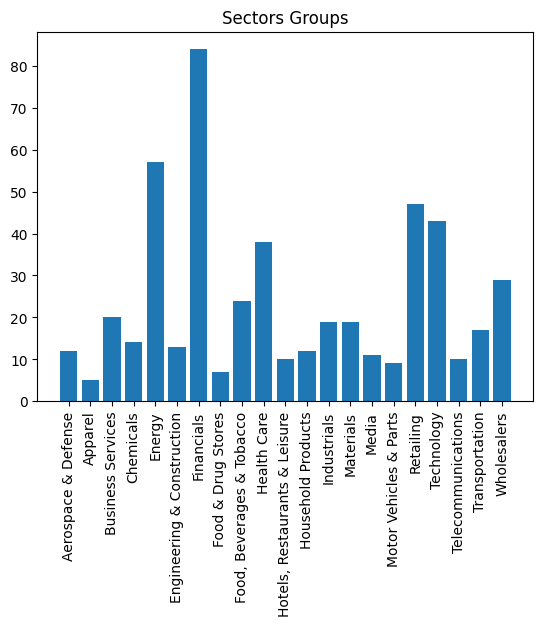

In [6]:
name_list = []
num_list = []
for name,sector in sectors:
    name_list.append(name)
    num_list.append(len(sector))
    print('sector name is {0} and number of entries is {1}'.format(name,len(sector)))
plt.figure()
plt.bar(range(len(name_list)),num_list)
plt.xticks(range(len(name_list)),name_list,rotation=90)
plt.title('Sectors Groups')
plt.show()


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               500 non-null    int64  
 1   Title              500 non-null    object 
 2   Website            500 non-null    object 
 3   Employees          500 non-null    int64  
 4   Sector             500 non-null    object 
 5   Industry           500 non-null    object 
 6   Hqlocation         500 non-null    object 
 7   Hqaddr             500 non-null    object 
 8   Hqcity             500 non-null    object 
 9   Hqstate            500 non-null    object 
 10  Hqzip              500 non-null    int64  
 11  Hqtel              500 non-null    object 
 12  Ceo                500 non-null    object 
 13  Ceo-title          500 non-null    object 
 14  Address            500 non-null    object 
 15  Ticker             500 non-null    object 
 16  Fullname           500 non

# Generating Data Quatily Report

### Continuous Features : We will Check For
* Count
* Mean
* Standard Deviation
* min
* max
* median
* Upper Quartile
* Lower Quartile
* Cardinality
* Missing Values

In [8]:
data_quality_report = data.describe()

In [9]:
data_quality_report

,Rank,Employees,Hqzip,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Net Expenses,Change in Revenue,Change in Profits,Financial Risk
count,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02,500.0000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,250.492000,5.635013e+04,46791.714000,24111.748000,3.75800,1779.479800,26.579200,8.038934e+04,13640.1470,22332.268200,2.411179e+06,1.779746e+05,1.034000
std,144.477366,1.234520e+05,30160.384765,38337.353337,19.96748,3937.558721,649.036355,2.704257e+05,30523.1538,36111.467986,3.833735e+06,3.937654e+05,0.736157
min,1.000000,8.300000e+01,1104.000000,5145.000000,-57.50000,-6177.000000,-1499.600000,4.370000e+02,-12688.0000,1713.000000,5.144972e+05,-6.188687e+05,0.000000
25%,125.750000,1.190000e+04,19099.000000,7245.000000,-3.82500,235.725000,-20.300000,8.436500e+03,1997.5000,6749.250000,7.244623e+05,2.370648e+04,0.000000
50%,250.500000,2.500000e+04,46244.500000,11384.000000,1.90000,683.600000,2.250000,1.932450e+04,4981.0000,10556.100000,1.138396e+06,6.883995e+04,1.000000
75%,375.250000,5.682525e+04,75045.000000,22605.250000,7.32500,1770.775000,20.450000,4.812600e+04,12467.7500,20214.500000,2.260533e+06,1.771058e+05,2.000000
max,500.000000,2.300000e+06,98188.000000,485873.000000,197.30000,45687.000000,12450.000000,3.287968e+06,283001.0000,472230.000000,4.858730e+07,4.568686e+06,2.000000


In [10]:
data_quality_report.loc[len(data_quality_report.index)] = [len(data[i].unique()) for i in data_quality_report.columns]

In [11]:
data_quality_report = data_quality_report.rename(index={8:'Cardinality'})

In [12]:
data_quality_report

,Rank,Employees,Hqzip,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Net Expenses,Change in Revenue,Change in Profits,Financial Risk
count,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02,500.0000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,250.492000,5.635013e+04,46791.714000,24111.748000,3.75800,1779.479800,26.579200,8.038934e+04,13640.1470,22332.268200,2.411179e+06,1.779746e+05,1.034000
std,144.477366,1.234520e+05,30160.384765,38337.353337,19.96748,3937.558721,649.036355,2.704257e+05,30523.1538,36111.467986,3.833735e+06,3.937654e+05,0.736157
min,1.000000,8.300000e+01,1104.000000,5145.000000,-57.50000,-6177.000000,-1499.600000,4.370000e+02,-12688.0000,1713.000000,5.144972e+05,-6.188687e+05,0.000000
25%,125.750000,1.190000e+04,19099.000000,7245.000000,-3.82500,235.725000,-20.300000,8.436500e+03,1997.5000,6749.250000,7.244623e+05,2.370648e+04,0.000000
50%,250.500000,2.500000e+04,46244.500000,11384.000000,1.90000,683.600000,2.250000,1.932450e+04,4981.0000,10556.100000,1.138396e+06,6.883995e+04,1.000000
75%,375.250000,5.682525e+04,75045.000000,22605.250000,7.32500,1770.775000,20.450000,4.812600e+04,12467.7500,20214.500000,2.260533e+06,1.771058e+05,2.000000
max,500.000000,2.300000e+06,98188.000000,485873.000000,197.30000,45687.000000,12450.000000,3.287968e+06,283001.0000,472230.000000,4.858730e+07,4.568686e+06,2.000000
Cardinality,497.000000,3.990000e+02,372.000000,495.000000,287.00000,494.000000,377.000000,4.980000e+02,496.0000,499.000000,5.000000e+02,4.990000e+02,3.000000


### using data cardinality report on some categorical features like sector , industry, ticker and maybe state

#### here we will check for  :
* mode 
* cardinality
* missing values 
* mode
* mode Frequecy
* mode percentage

In [13]:
cardinality_report  = [len(data[i].unique()) for i in ['Industry','Sector','Ticker','Hqstate','Hqcity','Hqlocation']]

In [14]:
cardinality_report

[73, 21, 468, 37, 239, 246]

In [15]:
import statistics as s
mode_report = [data.loc[:,i].mode() for i in ['Industry','Sector','Ticker','Hqstate','Hqcity','Hqlocation']]

In [16]:
mode_report

[0    Utilities: Gas and Electric
 Name: Industry, dtype: object,
 0    Financials
 Name: Sector, dtype: object,
 0    NFLX
 Name: Ticker, dtype: object,
 0    NY
 Name: Hqstate, dtype: object,
 0    New York
 Name: Hqcity, dtype: object,
 0    New York, NY
 Name: Hqlocation, dtype: object]

In [17]:
missing_value_report = [len(data[data[i].isna()==True]) for i in ['Industry','Sector','Ticker','Hqstate','Hqcity','Hqlocation']]

In [18]:
missing_value_report

[0, 0, 0, 0, 0, 0]

In [19]:
column = ['Industry','Sector','Ticker','Hqstate','Hqcity','Hqlocation']
mode_freq = [len(data[data[column[i]]==mode_report[i][0]]) for i in range(len(column))]
mode_freq

[22, 84, 3, 54, 45, 45]

In [20]:
mode_percentage = [i/500 for i in mode_freq]

In [21]:
data_report = [cardinality_report,mode_report,missing_value_report,mode_freq,mode_percentage]

In [22]:
data_quality_report_categorical = pd.DataFrame(index = ['Cardinality','Mode','Missing Values','Mode_Freq','Mode Percentage']  , data = data_report ,columns = ['Industry','Sector','Ticker','Hqstate','Hqcity','Hqlocation'] )

In [23]:
data_quality_report_categorical

,Industry,Sector,Ticker,Hqstate,Hqcity,Hqlocation
Cardinality,73,21,468,37,239,246
Mode,0 Utilities: Gas and Electric Name: Industr...,"0 Financials Name: Sector, dtype: object","0 NFLX Name: Ticker, dtype: object","0 NY Name: Hqstate, dtype: object","0 New York Name: Hqcity, dtype: object","0 New York, NY Name: Hqlocation, dtype: object"
Missing Values,0,0,0,0,0,0
Mode_Freq,22,84,3,54,45,45
Mode Percentage,0.044,0.168,0.006,0.108,0.09,0.09


In [24]:
# from the above data the cardinality of Ticker is quite high so it cannot be considered in categorical columns

# No null or missing values in both categorical and continuous Features

# Fitlering OutLiers

In [26]:
# Finding outliers in continuous variables
lower_Quartile_columns = list(data_quality_report.loc['25%',:])

In [27]:
lower_Quartile_columns

[125.75,
 11900.0,
 19099.0,
 7245.0,
 -3.8249999999999997,
 235.725,
 -20.3,
 8436.5,
 1997.5,
 6749.25,
 724462.275,
 23706.475000000002,
 0.0]

In [28]:
upper_Quartile_columns = list(data_quality_report.loc['75%',:])

In [29]:
IQR = [upper_Quartile_columns[i] - lower_Quartile_columns[i] for i in range(len(data_quality_report.columns))]

In [30]:
IQR

[249.5,
 44925.25,
 55946.0,
 15360.25,
 11.15,
 1535.0500000000002,
 40.75,
 39689.5,
 10470.25,
 13465.25,
 1536070.25,
 153399.275,
 2.0]

In [31]:
lower_bound_columns = [lower_Quartile_columns[i]-1.5*IQR[i] for i in range(len(data_quality_report.columns))]

In [32]:
import statistics
lower_bound_columns_method_2 = []
for i in data_quality_report.columns:
    x = list(data[i])
    value = statistics.mean(x)-3*(statistics.stdev(x))
    lower_bound_columns_method_2.append(value)

In [33]:
upper_bound_columns_method_2 = []
for i in data_quality_report.columns:
    x = list(data[i])
    value = statistics.mean(x)+3*(statistics.stdev(x))
    upper_bound_columns_method_2.append(value)

In [34]:
upper_bound_columns = [upper_Quartile_columns[i]+1.5*IQR[i] for i in range(len(data_quality_report.columns))]

In [35]:
lower_bound_columns

[-248.5,
 -55487.875,
 -64820.0,
 -15795.375,
 -20.55,
 -2066.8500000000004,
 -81.425,
 -51097.75,
 -13707.875,
 -13448.625,
 -1579643.1,
 -206392.43749999997,
 -3.0]

In [36]:
upper_bound_columns

[749.5,
 124213.125,
 158964.0,
 45645.625,
 24.05,
 4073.3500000000004,
 81.575,
 107660.25,
 28173.125,
 40412.375,
 4564637.9,
 407204.6625,
 5.0]

In [37]:
# number of outliers in each column is
columns = list(data_quality_report.columns)
num_outliers_upper = [len(data[data[columns[i]]>upper_bound_columns[i]]) for i in range(len(upper_bound_columns))]
num_outliers_lower = [len(data[data[columns[i]]<lower_bound_columns[i]]) for i in range(len(lower_bound_columns))]

In [38]:
num_outliers_upper

[0, 52, 0, 62, 35, 58, 47, 70, 52, 62, 62, 58, 0]

In [39]:
num_outliers_lower

[0, 0, 0, 0, 15, 10, 34, 0, 0, 0, 0, 10, 0]

In [40]:
total_outlier  = sum(num_outliers_upper) + sum(num_outliers_lower)
total_outlier

627

In [41]:
# Using clamping method
# if value > upper bound then value = upper bound
# if value < lower bound then value = lower bound

In [42]:
# finding indexes of columns with value greater than upper bound 
index_list = []
for i in range(len(columns)):
    print("verify column name {0} and number of outliers is {1}".format(columns[i]
,len(data[data[columns[i]]>upper_bound_columns[i]])))
    index_list.append(list(data[data[columns[i]]>upper_bound_columns[i]].index))

verify column name Rank and number of outliers is 0
verify column name Employees and number of outliers is 52
verify column name Hqzip and number of outliers is 0
verify column name Revenues and number of outliers is 62
verify column name Revchange and number of outliers is 35
verify column name Profits and number of outliers is 58
verify column name Prftchange and number of outliers is 47
verify column name Assets and number of outliers is 70
verify column name Totshequity and number of outliers is 52
verify column name Net Expenses and number of outliers is 62
verify column name Change in Revenue and number of outliers is 62
verify column name Change in Profits and number of outliers is 58
verify column name Financial Risk and number of outliers is 0


In [43]:
columns

['Rank',
 'Employees',
 'Hqzip',
 'Revenues',
 'Revchange',
 'Profits',
 'Prftchange',
 'Assets',
 'Totshequity',
 'Net Expenses',
 'Change in Revenue',
 'Change in Profits',
 'Financial Risk']

In [44]:
upper_bound_columns

[749.5,
 124213.125,
 158964.0,
 45645.625,
 24.05,
 4073.3500000000004,
 81.575,
 107660.25,
 28173.125,
 40412.375,
 4564637.9,
 407204.6625,
 5.0]

In [45]:
index_list

[[],
 [0,
  1,
  5,
  6,
  7,
  8,
  9,
  11,
  12,
  13,
  15,
  16,
  17,
  20,
  22,
  23,
  24,
  25,
  29,
  30,
  31,
  34,
  37,
  39,
  40,
  43,
  45,
  48,
  49,
  51,
  57,
  58,
  62,
  71,
  72,
  80,
  84,
  86,
  109,
  111,
  126,
  130,
  150,
  151,
  161,
  162,
  177,
  191,
  204,
  240,
  384,
  398],
 [],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61],
 [11,
  48,
  65,
  95,
  97,
  105,
  135,
  155,
  189,
  190,
  207,
  246,
  300,
  303,
  312,
  313,
  316,
  325,
  345,
  351,
  352,
  362,
  367,
  380,
  382,
  383,
  386,
  405,
  412,
  414,
  420,
  426,
  436,
  465,
  466],
 [0,
  1,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  12,
  13,
  16,
  1

In [46]:
columns = data_quality_report.columns

In [47]:
# clamping with upper bound
count = 0
for j in index_list:
    print('columns is {0}'.format(columns[count]))
    for k in j:
        if(columns[count]!='Rank' and columns[count]!='Financial Risk'):
            data.loc[k,columns[count]] = upper_bound_columns[count]
            #print("Replacing {0} with {1}".format(data.loc[k,columns[count]],upper_bound_columns[count]))
            #print('Final Value is {0}'.format(data.loc[k,columns[count]]))
    count = count + 1

columns is Rank
columns is Employees
columns is Hqzip
columns is Revenues
columns is Revchange
columns is Profits
columns is Prftchange
columns is Assets
columns is Totshequity
columns is Net Expenses
columns is Change in Revenue
columns is Change in Profits
columns is Financial Risk


In [48]:
data

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Net Expenses,Change in Revenue,Change in Profits,Financial Risk
0,1,Walmart,http://www.walmart.com,124213.125,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,45645.625,0.8,4073.35,-7.2,107660.25,28173.125,40412.375,4564637.9,407204.6625,2
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,124213.125,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,45645.625,6.1,4073.35,0.0,107660.25,28173.125,40412.375,4564637.9,407204.6625,2
2,3,Apple,http://www.apple.com,116000.000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,45645.625,-7.7,4073.35,-14.4,107660.25,28173.125,40412.375,4564637.9,407204.6625,2
3,4,Exxon Mobil,http://www.exxonmobil.com,72700.000,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,45645.625,-16.7,4073.35,-51.5,107660.25,28173.125,40412.375,4564637.9,407204.6625,2
4,5,McKesson,http://www.mckesson.com,68000.000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,45645.625,6.2,2258.00,53.0,56563.00,8924.000,40412.375,4564637.9,225853.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Michaels Cos.,http://www.michaels.com,31000.000,Retailing,Specialty Retailers: Other,"Irving, TX",8000 Bent Branch Dr.,Irving,TX,...,5197.000,5.8,378.20,4.2,2148.00,-1698.000,4818.800,519705.8,37824.2000,0
496,497,Toll Brothers,http://www.tollbrothers.com,4200.000,Engineering & Construction,Homebuilders,"Horsham, PA",250 Gibraltar Rd.,Horsham,PA,...,5170.000,23.9,382.10,5.2,9737.00,4229.000,4787.900,517023.9,38215.2000,2
497,498,Yahoo,http://www.yahoo.com,8500.000,Technology,Internet Services and Retailing,"Sunnyvale, CA",701 First Ave.,Sunnyvale,CA,...,5169.000,4.0,-214.30,5.2,48083.00,28173.125,5383.300,516904.0,-21424.8000,2
498,499,Vistra Energy,http://www.vistraenergy.com,4431.000,Energy,Energy,"Dallas, TX",1601 Bryan St.,Dallas,TX,...,5164.000,4.0,-214.30,5.2,15167.00,6597.000,5378.300,516404.0,-21424.8000,2


In [49]:
# lets verify if it worked or not
for i in range(len(columns)):
    print("verify column name {0} and number of outliers is {1}".format(columns[i]
,len(data[data[columns[i]]>upper_bound_columns[i]])))

verify column name Rank and number of outliers is 0
verify column name Employees and number of outliers is 0
verify column name Hqzip and number of outliers is 0
verify column name Revenues and number of outliers is 0
verify column name Revchange and number of outliers is 0
verify column name Profits and number of outliers is 0
verify column name Prftchange and number of outliers is 0
verify column name Assets and number of outliers is 0
verify column name Totshequity and number of outliers is 0
verify column name Net Expenses and number of outliers is 0
verify column name Change in Revenue and number of outliers is 0
verify column name Change in Profits and number of outliers is 0
verify column name Financial Risk and number of outliers is 0


In [50]:
# Repeating for lower bound columns
index_list_lower = []
for i in range(len(columns)):
    print("verify column name {0} and number of outliers is {1}".format(columns[i]
,len(data[data[columns[i]]<lower_bound_columns[i]])))
    index_list_lower.append(list(data[data[columns[i]]<lower_bound_columns[i]].index))

verify column name Rank and number of outliers is 0
verify column name Employees and number of outliers is 0
verify column name Hqzip and number of outliers is 0
verify column name Revenues and number of outliers is 0
verify column name Revchange and number of outliers is 15
verify column name Profits and number of outliers is 10
verify column name Prftchange and number of outliers is 34
verify column name Assets and number of outliers is 0
verify column name Totshequity and number of outliers is 0
verify column name Net Expenses and number of outliers is 0
verify column name Change in Revenue and number of outliers is 0
verify column name Change in Profits and number of outliers is 10
verify column name Financial Risk and number of outliers is 0


In [51]:
# clamping with upper bound
count = 0
for j in index_list_lower:
    #print('columns is {0}'.format(columns[count]))
    for k in j:
        if(columns[count]!='Financial Risk'):
            data.loc[k,columns[count]] = lower_bound_columns[count]
            #print("Replacing {0} with {1}".format(data.loc[k,columns[count]],upper_bound_columns[count]))
            #print('Final Value is {0}'.format(data.loc[k,columns[count]]))
    count = count + 1

In [52]:
# lets verify if it worked or not
for i in range(len(columns)):
    print("verify column name {0} and number of outliers is {1}".format(columns[i]
,len(data[data[columns[i]]<lower_bound_columns[i]])))

verify column name Rank and number of outliers is 0
verify column name Employees and number of outliers is 0
verify column name Hqzip and number of outliers is 0
verify column name Revenues and number of outliers is 0
verify column name Revchange and number of outliers is 0
verify column name Profits and number of outliers is 0
verify column name Prftchange and number of outliers is 0
verify column name Assets and number of outliers is 0
verify column name Totshequity and number of outliers is 0
verify column name Net Expenses and number of outliers is 0
verify column name Change in Revenue and number of outliers is 0
verify column name Change in Profits and number of outliers is 0
verify column name Financial Risk and number of outliers is 0


In [53]:
data['Financial Risk'].value_counts()

1    229
2    144
0    127
Name: Financial Risk, dtype: int64

### Now that all Outliers have been removed. Data Distributions can Begin

###### Data Distribution for Continuous Variables

In [25]:
continuous_columns = list(data_quality_report.columns) + ['Financial Risk']
dataset_continuous = data[[i for i in continuous_columns]]

In [26]:
data

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Net Expenses,Change in Revenue,Change in Profits,Financial Risk
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,485873,0.8,13643.0,-7.2,198825,77798.0,472230.0,48587300.8,1364292.8,2
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,223604,6.1,24074.0,0.0,620854,283001.0,199530.0,22360406.1,2407400.0,2
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,215639,-7.7,45687.0,-14.4,321686,128249.0,169952.0,21563892.3,4568685.6,2
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,205004,-16.7,7840.0,-51.5,330314,167325.0,197164.0,20500383.3,783948.5,2
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,192487,6.2,2258.0,53.0,56563,8924.0,190229.0,19248706.2,225853.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Michaels Cos.,http://www.michaels.com,31000,Retailing,Specialty Retailers: Other,"Irving, TX",8000 Bent Branch Dr.,Irving,TX,...,5197,5.8,378.2,4.2,2148,-1698.0,4818.8,519705.8,37824.2,0
496,497,Toll Brothers,http://www.tollbrothers.com,4200,Engineering & Construction,Homebuilders,"Horsham, PA",250 Gibraltar Rd.,Horsham,PA,...,5170,23.9,382.1,5.2,9737,4229.0,4787.9,517023.9,38215.2,2
497,498,Yahoo,http://www.yahoo.com,8500,Technology,Internet Services and Retailing,"Sunnyvale, CA",701 First Ave.,Sunnyvale,CA,...,5169,4.0,-214.3,5.2,48083,31049.0,5383.3,516904.0,-21424.8,2
498,499,Vistra Energy,http://www.vistraenergy.com,4431,Energy,Energy,"Dallas, TX",1601 Bryan St.,Dallas,TX,...,5164,4.0,-214.3,5.2,15167,6597.0,5378.3,516404.0,-21424.8,2


In [56]:
dataset_continuous

,Rank,Employees,Hqzip,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Net Expenses,Change in Revenue,Change in Profits,Financial Risk,Financial Risk
0,1,124213.125,72716,45645.625,0.8,4073.35,-7.2,107660.25,28173.125,40412.375,4564637.9,407204.6625,2,2
1,2,124213.125,68131,45645.625,6.1,4073.35,0.0,107660.25,28173.125,40412.375,4564637.9,407204.6625,2,2
2,3,116000.000,95014,45645.625,-7.7,4073.35,-14.4,107660.25,28173.125,40412.375,4564637.9,407204.6625,2,2
3,4,72700.000,75039,45645.625,-16.7,4073.35,-51.5,107660.25,28173.125,40412.375,4564637.9,407204.6625,2,2
4,5,68000.000,94104,45645.625,6.2,2258.00,53.0,56563.00,8924.000,40412.375,4564637.9,225853.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,31000.000,75063,5197.000,5.8,378.20,4.2,2148.00,-1698.000,4818.800,519705.8,37824.2000,0,0
496,497,4200.000,19044,5170.000,23.9,382.10,5.2,9737.00,4229.000,4787.900,517023.9,38215.2000,2,2
497,498,8500.000,94089,5169.000,4.0,-214.30,5.2,48083.00,28173.125,5383.300,516904.0,-21424.8000,2,2
498,499,4431.000,75201,5164.000,4.0,-214.30,5.2,15167.00,6597.000,5378.300,516404.0,-21424.8000,2,2


In [27]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
scaler = MinMaxScaler()
Normalized_data = scaler.fit_transform(dataset_continuous)

In [28]:
data_continuous_normalized = pd.DataFrame(data=Normalized_data,columns=list(dataset_continuous.columns))

In [29]:

for i in data_continuous_normalized.columns:
    print('skewness of normalized column {0} is {1}'.format(i,skew(data_continuous_normalized[i],axis=0,bias=True)))

skewness of normalized column Rank is 0.00010056922624924302
skewness of normalized column Employees is 12.558208836266013
skewness of normalized column Hqzip is 0.13237154509461346
skewness of normalized column Revenues is 5.463613050015587
skewness of normalized column Revchange is 3.407174754670818
skewness of normalized column Profits is 4.895434003483766
skewness of normalized column Prftchange is 15.998228662860262
skewness of normalized column Assets is 7.841125612631599
skewness of normalized column Totshequity is 5.591916599647215
skewness of normalized column Net Expenses is 5.762507169315475
skewness of normalized column Change in Revenue is 5.463613410185204
skewness of normalized column Change in Profits is 4.894836454867112
skewness of normalized column Financial Risk is [-0.05331363 -0.05331363]
skewness of normalized column Financial Risk is [-0.05331363 -0.05331363]


In [60]:
# skewed columns are Employees, Revenues , Profits , Assets and Totsequity
dataset_continuous['Employees']

0      124213.125
1      124213.125
2      116000.000
3       72700.000
4       68000.000
          ...    
495     31000.000
496      4200.000
497      8500.000
498      4431.000
499    110000.000
Name: Employees, Length: 500, dtype: float64

skewness of normalized column Employees is 12.558208836266013
skewness of normalized column Revenues is 5.463613050015587
skewness of normalized column Assets is 7.841125612631599
skewness of Log Tranformed column Employees is -0.09572654063041253
skewness of Log Tranformed column Revenues is 1.1430891660370088
skewness of Log Tranformed column Assets is 0.667430695271316
skewness of Box-cox Tranformed column Employees is 0.0072986955854679545
skewness of Box-cox Tranformed column Revenues is 0.2172515570514014
skewness of Box-cox Tranformed column Assets is 0.0022467632564392944


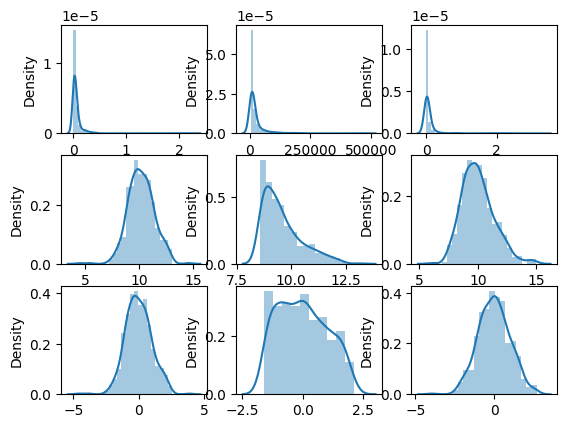

In [30]:
import warnings
import math
from sklearn.preprocessing import power_transform 
warnings.filterwarnings('ignore')
# using various transformations on the skewed columns but not on the normalized values
fig,axes = plt.subplots(3,3)
Employees_data = list(dataset_continuous['Employees'])
Revenues_data = list(dataset_continuous['Revenues'])
Assets_data = list(dataset_continuous['Assets'])

# calculating log transform on three skewed columns
log_Employees = [math.log(i) for i in Employees_data]
log_Revenues  = [math.log(i) for i in Revenues_data]
log_Assets = [math.log(i) for i in Assets_data]

# calculating Box-Cox Transform
box_cox_fit_employees = list(power_transform(dataset_continuous[['Employees']], method='box-cox'))
box_cox_fit_employees = [i[0] for i in box_cox_fit_employees ]
box_cox_employees = pd.DataFrame(box_cox_fit_employees, columns=['Employees'])

box_cox_fit_Revenues = list(power_transform(dataset_continuous[['Revenues']], method='box-cox'))
box_cox_fit_Revenues = [i[0] for i in box_cox_fit_Revenues ]
box_cox_Revenues = pd.DataFrame(box_cox_fit_Revenues, columns=['Revenues'])

#box_cox_fit_Revenues_changes = list(power_transform(dataset_continuous[['Change in Revenue']], method='box-cox'))
#box_cox_fit_Revenues_changes = [i[0] for i in box_cox_fit_Revenues_changes ]
#box_cox_Revenues_changes = pd.DataFrame(box_cox_fit_Revenues_changes, columns=['Revenues'])


box_cox_fit_Assets = list(power_transform(dataset_continuous[['Assets']], method='box-cox'))
box_cox_fit_Assets = [i[0] for i in box_cox_fit_Assets]
box_cox_Assets = pd.DataFrame(box_cox_fit_Assets, columns=['Assets'])


# plotting the normalized distributions
sns.distplot(dataset_continuous['Employees'],kde=True,ax=axes[0,0])
sns.distplot(dataset_continuous['Revenues'],kde=True,ax=axes[0,1])
sns.distplot(dataset_continuous['Assets'],kde=True,ax=axes[0,2])

# plotting the log transform distribution
sns.distplot(log_Employees,kde=True,ax=axes[1,0])
sns.distplot(log_Revenues,kde=True,ax=axes[1,1])
sns.distplot(log_Assets,kde=True,ax=axes[1,2])

# plotting the box-cox tranformations
sns.distplot(box_cox_employees,kde=True,ax=axes[2,0])
sns.distplot(box_cox_Revenues,kde=True,ax=axes[2,1])
sns.distplot(box_cox_Assets,kde=True,ax=axes[2,2])

# printing the skewness

print('skewness of normalized column {0} is {1}'.format('Employees',
skew(data_continuous_normalized['Employees'],axis=0,bias=True)))

print('skewness of normalized column {0} is {1}'.format('Revenues',
skew(data_continuous_normalized['Revenues'],axis=0,bias=True)))

print('skewness of normalized column {0} is {1}'.format('Assets',
skew(data_continuous_normalized['Assets'],axis=0,bias=True)))

print('skewness of Log Tranformed column {0} is {1}'.format('Employees',
skew(log_Employees,axis=0,bias=True)))

print('skewness of Log Tranformed column {0} is {1}'.format('Revenues',
skew(log_Revenues,axis=0,bias=True)))

print('skewness of Log Tranformed column {0} is {1}'.format('Assets',
skew(log_Assets,axis=0,bias=True)))

print('skewness of Box-cox Tranformed column {0} is {1}'.format('Employees',
skew(box_cox_fit_employees,axis=0,bias=True)))

print('skewness of Box-cox Tranformed column {0} is {1}'.format('Revenues',
skew(box_cox_fit_Revenues,axis=0,bias=True)))

print('skewness of Box-cox Tranformed column {0} is {1}'.format('Assets',
skew(box_cox_fit_Assets,axis=0,bias=True)))






In [62]:
# thus now only 2 columns remain the Profits and the Totsequity column. 
# These columns have negative values. So a different transform needs to be used for them so using square log

In [31]:
equity_data = list(dataset_continuous['Totshequity'])
equity_square_log = [math.log(i**2) for i in equity_data]
skew(equity_square_log,axis=0,bias=True)

-0.07469492682930512

In [32]:
# this made it worse
profits_data = list(dataset_continuous['Profits'])
profits_square_log = [math.log(i**2) for i in profits_data]
skew(profits_square_log,axis=0,bias=True)

-0.5534927026237255

In [33]:
# using another method log(x+(1-min(x)))
profits_data_modified_log = [math.log(i+(1-min(profits_data))) for i in profits_data ]
skew(profits_data_modified_log,axis=0,bias=True)

-9.3354155851624

In [34]:
# using standardization instead of normalization
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
scaler = StandardScaler()
Standardized_data = scaler.fit_transform(dataset_continuous)

In [35]:
data_continuous_standardized = pd.DataFrame(data=Standardized_data,columns=list(dataset_continuous.columns))
for i in data_continuous_standardized.columns:
    print('skewness of Standardized column {0} is {1}'.format(i,skew(data_continuous_standardized[i],axis=0,bias=True)))

skewness of Standardized column Rank is 0.00010056922624914932
skewness of Standardized column Employees is 12.558208836266008
skewness of Standardized column Hqzip is 0.1323715450946134
skewness of Standardized column Revenues is 5.463613050015585
skewness of Standardized column Revchange is 3.407174754670817
skewness of Standardized column Profits is 4.895434003483765
skewness of Standardized column Prftchange is 15.998228662860257
skewness of Standardized column Assets is 7.841125612631599
skewness of Standardized column Totshequity is 5.591916599647214
skewness of Standardized column Net Expenses is 5.762507169315474
skewness of Standardized column Change in Revenue is 5.463613410185205
skewness of Standardized column Change in Profits is 4.894836454867111
skewness of Standardized column Financial Risk is [-0.05331363 -0.05331363]
skewness of Standardized column Financial Risk is [-0.05331363 -0.05331363]


In [36]:
columns_categorical = ['Industry','Sector','Ticker','Hqstate','Hqcity','Hqlocation']
dataset_categorical = data[[i for i in columns_categorical]]

In [37]:
dataset_categorical

,Industry,Sector,Ticker,Hqstate,Hqcity,Hqlocation
0,General Merchandisers,Retailing,WMT,AR,Bentonville,"Bentonville, AR"
1,Insurance: Property and Casualty (Stock),Financials,BRKA,NE,Omaha,"Omaha, NE"
2,"Computers, Office Equipment",Technology,AAPL,CA,Cupertino,"Cupertino, CA"
3,Petroleum Refining,Energy,XOM,TX,Irving,"Irving, TX"
4,Wholesalers: Health Care,Wholesalers,MCK,CA,San Francisco,"San Francisco, CA"
...,...,...,...,...,...,...
495,Specialty Retailers: Other,Retailing,MIK,TX,Irving,"Irving, TX"
496,Homebuilders,Engineering & Construction,TOL,PA,Horsham,"Horsham, PA"
497,Internet Services and Retailing,Technology,YHOO,CA,Sunnyvale,"Sunnyvale, CA"
498,Energy,Energy,VST,TX,Dallas,"Dallas, TX"


#### Conclusions of Skewness Reduction and outlier handling :

* All outliers clamped with upper bound and lower bound using 1.5 as the multiplier for IQR
* Boxcox transform produced good results for Employees , Revenue and Assets
* Profits unfortunately did not respond well to tranformations (still searching for better solutions)
  till then using normalized value

* Total Equity responded well to square log that is log(square(x)) 
* Hqzip and Revchange are better for normalized values

### There are no more Data Cleaning Operations. The Categorical Features have No null values. Thus we can Proceed to Formulating a few Research Questions

##  Reasearch Question 

#### The Ranking of the companies in Fortune 500 is based on Revenue. However the data collected is only for one year. Thus would Revenue be a good measure for ranking of a company or would any other important KPI be used for ranking of the companies. One such KPI is the Quick Ratio = Current Assets/Current Liabilities. There is no liability data in our dataset. So we predict the shareholders equity using ML Algorithms. Equity cannot be calculated using any of the factors in the dataset , therefore we use ML.

In [38]:
scaler = StandardScaler()
numpy_data_Totshequity = data['Totshequity'].to_numpy()
Normalized_data = scaler.fit_transform(numpy_data_Totshequity.reshape(-1,1))

In [39]:
list_normalized_data = [i[0] for i in Normalized_data]

In [40]:
numpy_data_Net_Expenses = data['Net Expenses'].to_numpy()
Normalized_data_expenses = scaler.fit_transform(numpy_data_Net_Expenses.reshape(-1,1))

In [41]:
list_normalized_data_expenses = [i[0] for i in Normalized_data_expenses]

In [42]:
# now creating transformed dataset of continuous values
dict_data = {}
dict_data['Employees'] =  list(box_cox_fit_employees)
dict_data['Hqzip'] = list(data_continuous_normalized['Hqzip'])
dict_data['Revenues'] = list(box_cox_fit_Revenues)
dict_data['Revchange'] = list(data_continuous_normalized['Revchange'])
dict_data['Profits'] = list(data_continuous_normalized['Profits'])
dict_data['Assets'] = list(box_cox_fit_Assets)
#dict_data['Change in Profits']  = data_continuous_standardized['Change in Profits']
#dict_data['Change in Revenue']  = list(box_cox_fit_Revenues_changes)
dict_data['Net Expenses'] = list_normalized_data_expenses
dict_data['Totshequity'] = list_normalized_data
dict_data['Risk Of Investment'] = data['Financial Risk']

In [43]:
#dataset_modified_continuous = pd.DataFrame(data=dict_data)
#Normalized_data = scaler.fit_transform(dataset_continuous)
dataset_modified_continuous = pd.DataFrame(data=dict_data)

In [44]:
dataset_modified_continuous

,Employees,Hqzip,Revenues,Revchange,Profits,Assets,Net Expenses,Totshequity,Risk Of Investment
0,3.849921,0.737629,2.134300,0.228807,0.382153,1.494089,12.471061,2.104046,2
1,2.222391,0.690402,1.991532,0.249608,0.583275,2.050915,4.911880,8.833642,2
2,1.226775,0.967307,1.983000,0.195447,1.000000,1.741479,4.091985,3.758577,2
3,0.829675,0.761557,1.970771,0.160126,0.270265,1.754557,4.846295,5.040068,2
4,0.773161,0.957933,1.954984,0.250000,0.162637,0.753004,4.654058,-0.154665,1
...,...,...,...,...,...,...,...,...,...
495,0.114252,0.761804,-1.586770,0.248430,0.126392,-2.016292,-0.485469,-0.503012,0
496,-1.519030,0.184788,-1.599743,0.319466,0.126467,-0.561045,-0.486326,-0.308637,2
497,-0.950023,0.957779,-1.600225,0.241366,0.114968,0.646218,-0.469821,0.570920,2
498,-1.476081,0.763226,-1.602641,0.241366,0.114968,-0.195371,-0.469960,-0.230979,2


In [45]:
dataset_categorical

,Industry,Sector,Ticker,Hqstate,Hqcity,Hqlocation
0,General Merchandisers,Retailing,WMT,AR,Bentonville,"Bentonville, AR"
1,Insurance: Property and Casualty (Stock),Financials,BRKA,NE,Omaha,"Omaha, NE"
2,"Computers, Office Equipment",Technology,AAPL,CA,Cupertino,"Cupertino, CA"
3,Petroleum Refining,Energy,XOM,TX,Irving,"Irving, TX"
4,Wholesalers: Health Care,Wholesalers,MCK,CA,San Francisco,"San Francisco, CA"
...,...,...,...,...,...,...
495,Specialty Retailers: Other,Retailing,MIK,TX,Irving,"Irving, TX"
496,Homebuilders,Engineering & Construction,TOL,PA,Horsham,"Horsham, PA"
497,Internet Services and Retailing,Technology,YHOO,CA,Sunnyvale,"Sunnyvale, CA"
498,Energy,Energy,VST,TX,Dallas,"Dallas, TX"


In [46]:
data.corr()

,Rank,Employees,Hqzip,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity,Net Expenses,Change in Revenue,Change in Profits,Financial Risk
Rank,1.000000,-0.352640,0.029406,-0.606259,0.041253,-0.449531,0.025459,-0.303619,-0.409557,-0.594612,-0.606259,-0.449478,0.037734
Employees,-0.352640,1.000000,0.014257,0.720442,0.023912,0.342599,0.003843,0.126906,0.275214,0.727492,0.720442,0.342598,0.038721
Hqzip,0.029406,0.014257,1.000000,0.057828,-0.045263,0.017292,-0.039772,-0.110753,0.015284,0.059507,0.057828,0.017226,0.167965
Revenues,-0.606259,0.720442,0.057828,1.000000,-0.011962,0.600239,-0.014150,0.329844,0.546892,0.996190,1.000000,0.600201,0.023379
Revchange,0.041253,0.023912,-0.045263,-0.011962,1.000000,0.017903,-0.069335,-0.025431,-0.004524,-0.014651,-0.011956,0.017788,0.059444
Profits,-0.449531,0.342599,0.017292,0.600239,0.017903,1.000000,0.013838,0.512700,0.715928,0.528198,0.600239,0.999999,0.035846
Prftchange,0.025459,0.003843,-0.039772,-0.014150,-0.069335,0.013838,1.000000,-0.010567,-0.011559,-0.016531,-0.014151,0.015486,0.018669
Assets,-0.303619,0.126906,-0.110753,0.329844,-0.025431,0.512700,-0.010567,1.000000,0.637710,0.294271,0.329844,0.512670,-0.223364
Totshequity,-0.409557,0.275214,0.015284,0.546892,-0.004524,0.715928,-0.011559,0.637710,1.000000,0.502538,0.546892,0.715892,0.035539
Net Expenses,-0.594612,0.727492,0.059507,0.996190,-0.014651,0.528198,-0.016531,0.294271,0.502538,1.000000,0.996190,0.528158,0.020912


In [47]:
# checking correlation with the target column
corr_data=dataset_modified_continuous.corr()
corr_data

,Employees,Hqzip,Revenues,Revchange,Profits,Assets,Net Expenses,Totshequity,Risk Of Investment
Employees,1.000000,-0.065165,0.576292,0.037065,0.364399,0.279820,0.486981,0.310723,0.023935
Hqzip,-0.065165,1.000000,-0.022789,-0.045263,0.017292,-0.109535,0.059507,0.015284,0.167965
Revenues,0.576292,-0.022789,1.000000,-0.039547,0.483869,0.617497,0.645895,0.441750,-0.036888
Revchange,0.037065,-0.045263,-0.039547,1.000000,0.017903,0.011090,-0.014651,-0.004524,0.059444
Profits,0.364399,0.017292,0.483869,0.017903,1.000000,0.484834,0.528198,0.715928,0.035846
Assets,0.279820,-0.109535,0.617497,0.011090,0.484834,1.000000,0.437777,0.557449,-0.216499
Net Expenses,0.486981,0.059507,0.645895,-0.014651,0.528198,0.437777,1.000000,0.502538,0.020912
Totshequity,0.310723,0.015284,0.441750,-0.004524,0.715928,0.557449,0.502538,1.000000,0.035539
Risk Of Investment,0.023935,0.167965,-0.036888,0.059444,0.035846,-0.216499,0.020912,0.035539,1.000000


In [48]:
correlation_data = corr_data.to_numpy()
correlation_data

array([[ 1.        , -0.06516459,  0.576292  ,  0.03706464,  0.36439927,
         0.27982016,  0.48698067,  0.31072303,  0.02393471],
       [-0.06516459,  1.        , -0.02278874, -0.04526271,  0.01729214,
        -0.10953488,  0.05950726,  0.01528381,  0.16796519],
       [ 0.576292  , -0.02278874,  1.        , -0.03954686,  0.48386868,
         0.61749691,  0.64589538,  0.44175043, -0.03688841],
       [ 0.03706464, -0.04526271, -0.03954686,  1.        ,  0.0179029 ,
         0.01109011, -0.01465093, -0.00452355,  0.05944371],
       [ 0.36439927,  0.01729214,  0.48386868,  0.0179029 ,  1.        ,
         0.48483418,  0.5281985 ,  0.71592829,  0.03584621],
       [ 0.27982016, -0.10953488,  0.61749691,  0.01109011,  0.48483418,
         1.        ,  0.43777664,  0.5574492 , -0.21649917],
       [ 0.48698067,  0.05950726,  0.64589538, -0.01465093,  0.5281985 ,
         0.43777664,  1.        ,  0.50253772,  0.02091189],
       [ 0.31072303,  0.01528381,  0.44175043, -0.00452355,  0

In [49]:
corr_columns = list(corr_data.columns)
for i in range(len(correlation_data)):
    for j in range(len(correlation_data[i])):
        if(j==i):
            continue
        elif(correlation_data[i][j]>0.60):
            print('High Correlation between feature columns {0} and {1} with value {2}'
                  .format(corr_columns[i],corr_columns[j],correlation_data[i][j]))
            

High Correlation between feature columns Revenues and Assets with value 0.61749691279788
High Correlation between feature columns Revenues and Net Expenses with value 0.6458953795357933
High Correlation between feature columns Profits and Totshequity with value 0.7159282933862758
High Correlation between feature columns Assets and Revenues with value 0.61749691279788
High Correlation between feature columns Net Expenses and Revenues with value 0.6458953795357933
High Correlation between feature columns Totshequity and Profits with value 0.7159282933862758


Thus continuous columns with high correlation with total equity are :
* Profits
* Assets
* Revenues is close behind but due to close correlation with Assets which has a better correlation with equity,it is rejected

Continuous columns with high correlation with each other are :
* Revenue 
* Assets

In [50]:
#sns.pairplot(dataset_modified_continuous)

#### Changing Attention to Categorical Columns

In [51]:
dataset_categorical = dataset_categorical[['Industry','Sector','Hqstate']]

In [52]:
# removed hqcity , hqlocation and Ticker because it made no sense due to high cardinality
dataset_categorical

,Industry,Sector,Hqstate
0,General Merchandisers,Retailing,AR
1,Insurance: Property and Casualty (Stock),Financials,NE
2,"Computers, Office Equipment",Technology,CA
3,Petroleum Refining,Energy,TX
4,Wholesalers: Health Care,Wholesalers,CA
...,...,...,...
495,Specialty Retailers: Other,Retailing,TX
496,Homebuilders,Engineering & Construction,PA
497,Internet Services and Retailing,Technology,CA
498,Energy,Energy,TX


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_industry = le.fit_transform(dataset_categorical['Industry'])
encoded_sector = le.fit_transform(dataset_categorical['Sector'])
encoded_state = le.fit_transform(dataset_categorical['Hqstate'])

In [54]:
dataset_categorical['Industry encoded'] = encoded_industry
dataset_categorical['Sector encoded'] = encoded_sector
dataset_categorical['HqState encoded'] = encoded_state

In [55]:
dataset_categorical

,Industry,Sector,Hqstate,Industry encoded,Sector encoded,HqState encoded
0,General Merchandisers,Retailing,AR,25,16,1
1,Insurance: Property and Casualty (Stock),Financials,NE,38,6,23
2,"Computers, Office Equipment",Technology,CA,11,17,3
3,Petroleum Refining,Energy,TX,49,4,33
4,Wholesalers: Health Care,Wholesalers,CA,72,20,3
...,...,...,...,...,...,...
495,Specialty Retailers: Other,Retailing,TX,59,16,33
496,Homebuilders,Engineering & Construction,PA,30,5,30
497,Internet Services and Retailing,Technology,CA,39,17,3
498,Energy,Energy,TX,16,4,33


#### Feature Selection using Embedded methods to check for ideal features that affect Total Equity

In [56]:
columns_categoricals = ['Hqzip','Industry encoded','Sector encoded',
'HqState encoded']

In [57]:
data_merged = dataset_modified_continuous.join(dataset_categorical)
columns = list(dataset_modified_continuous.columns) + columns_categoricals

In [58]:
columns.remove('Risk Of Investment')
columns.remove('Totshequity')
columns.remove('Assets')

In [59]:
# using an embedded decision tree for all the column feature selection
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(data_merged[columns],data_merged['Risk Of Investment'])
importances = model.feature_importances_
importances

array([0.09718403, 0.08766505, 0.10425711, 0.10579438, 0.12630921,
       0.09343678, 0.09458688, 0.13088955, 0.09529733, 0.0645797 ])

In [60]:
feature_significance = {}
for i,j in enumerate(columns):
    feature_significance[j] = importances[i]
feature_significance

{'Employees': 0.09718402935278432,
 'Hqzip': 0.0945868758036624,
 'Revenues': 0.10425710543277245,
 'Revchange': 0.10579437628133227,
 'Profits': 0.1263092059055905,
 'Net Expenses': 0.09343678018169553,
 'Industry encoded': 0.13088955324671006,
 'Sector encoded': 0.09529733109674543,
 'HqState encoded': 0.06457969724714736}

In [61]:
['Hqzip','Revchange','Industry encoded','Profits','Sector encoded']

['Hqzip', 'Revchange', 'Industry encoded', 'Profits', 'Sector encoded']

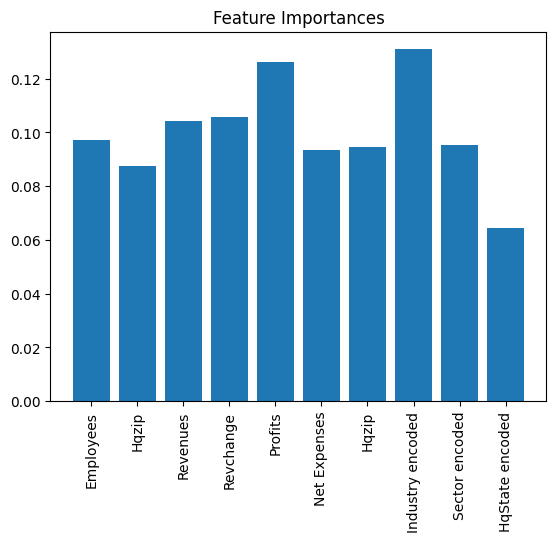

In [62]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(len(columns)),importances)
plt.xticks(range(len(columns)),columns,rotation=90)
plt.show()

In [63]:
# choosing the top 4 features that is Assets , Profits, Employees 

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X = data_merged[['Employees','Hqzip','Revchange','Industry encoded','Assets','Totshequity']]
Y  = data_merged['Risk Of Investment']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,shuffle=True,test_size=0.2,random_state=110)
kfold = KFold(n_splits=5,shuffle=True,random_state=109)
splits = kfold.split(X_train,Y_train)

In [65]:
train_indexes_per_split = []
test_indexes_per_split = []
for n,(train_index,test_index) in enumerate(splits):
    train_indexes_per_split.append(train_index)
    test_indexes_per_split.append(test_index)

In [66]:
xtrains = X_train.to_numpy()
ytrains = Y_train.to_numpy()

#### Model is Random Forest Regressor with n_estimators = 100

Accuracy value in training is 1.0 and cross val 0 is 0.75
Accuracy value in training is 1.0 and cross val 1 is 0.6625
Accuracy value in training is 1.0 and cross val 2 is 0.8125
Accuracy value in training is 1.0 and cross val 3 is 0.75
Accuracy value in training is 1.0 and cross val 4 is 0.7
Final Average Accuracy is 0.735


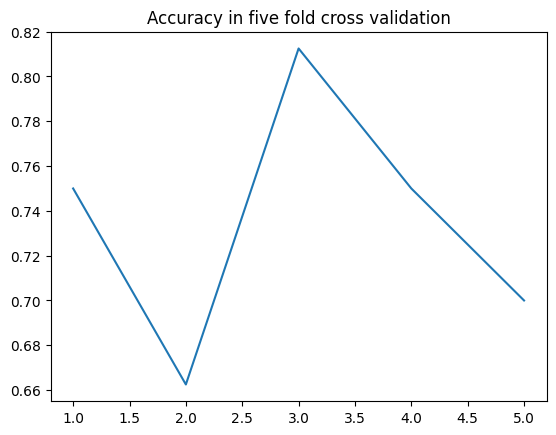

In [67]:
Accuracy = []
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
model_rfc = RandomForestClassifier(n_estimators = 500,random_state = 34)
for i in range(5):
    model_rfc.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_rfc.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_rfc.predict(xtrains[test_indexes_per_split[i]]))))
    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_rfc.predict(xtrains[test_indexes_per_split[i]])))
print('Final Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()

In [68]:
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_rfc.predict(X_test))))

Accuracy in Test Data is 0.75


#### Model is SVR with kernel Linear

Accuracy value in training is 0.565625 and cross val 0 is 0.4875
Accuracy value in training is 0.559375 and cross val 1 is 0.5375
Accuracy value in training is 0.5375 and cross val 2 is 0.575
Accuracy value in training is 0.5375 and cross val 3 is 0.5
Accuracy value in training is 0.534375 and cross val 4 is 0.5625
Final Average Accuracy is 0.5325


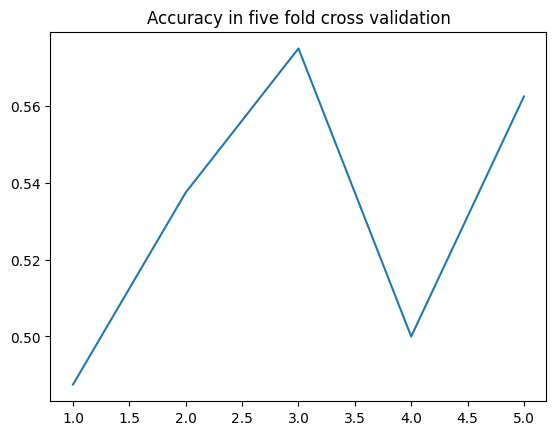

In [69]:
from sklearn.svm import SVC
Accuracy = []
model_svcl = SVC(kernel='linear')
for i in range(5):
    model_svcl.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_svcl.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_svcl.predict(xtrains[test_indexes_per_split[i]]))))
    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_svcl.predict(xtrains[test_indexes_per_split[i]])))
print('Final Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()

In [70]:
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_svcl.predict(X_test))))

Accuracy in Test Data is 0.47


### SVC with POLY Kernel

#### Model is SVR with kernel RBF

Accuracy value in training is 0.475 and cross val 0 is 0.45
Accuracy value in training is 0.478125 and cross val 1 is 0.4375
Accuracy value in training is 0.4625 and cross val 2 is 0.5
Accuracy value in training is 0.478125 and cross val 3 is 0.4375
Accuracy value in training is 0.45625 and cross val 4 is 0.525
Final Average Accuracy is 0.47000000000000003


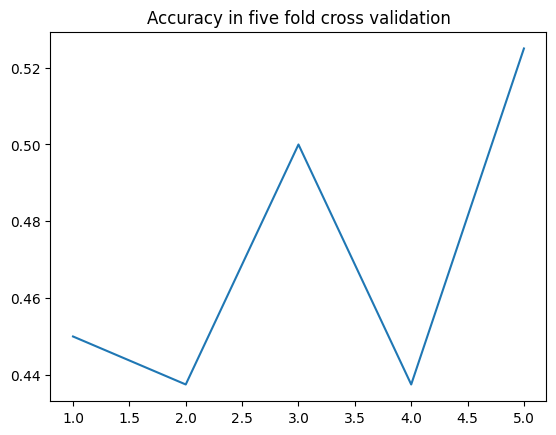

In [71]:
Accuracy = []
model_rbf = SVC(kernel='rbf',tol=0.0005)
for i in range(5):
    model_rbf.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_rbf.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_rbf.predict(xtrains[test_indexes_per_split[i]]))))
    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_rbf.predict(xtrains[test_indexes_per_split[i]])))
print('Final Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()

In [72]:
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_rbf.predict(X_test))))

Accuracy in Test Data is 0.41


#### Model is Decision Tree Regressor

Accuracy value in training is 0.784375 and cross val 0 is 0.6
Accuracy value in training is 0.69375 and cross val 1 is 0.575
Accuracy value in training is 0.734375 and cross val 2 is 0.725
Accuracy value in training is 0.753125 and cross val 3 is 0.7
Accuracy value in training is 0.753125 and cross val 4 is 0.65
Final Average Accuracy is 0.6499999999999999


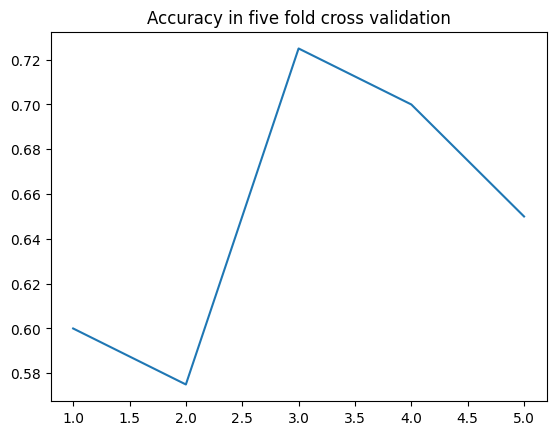

In [73]:
from sklearn.tree import DecisionTreeClassifier
Accuracy = []
model_dtc = DecisionTreeClassifier(max_depth=5)
for i in range(5):
    model_dtc.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_dtc.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_dtc.predict(xtrains[test_indexes_per_split[i]]))))

    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_dtc.predict(xtrains[test_indexes_per_split[i]])))
print('Final Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()

In [74]:
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_dtc.predict(X_test))))

Accuracy in Test Data is 0.56


Accuracy value in training is 0.759375 and cross val 0 is 0.575
Accuracy value in training is 0.815625 and cross val 1 is 0.725
Accuracy value in training is 0.78125 and cross val 2 is 0.7625
Accuracy value in training is 0.759375 and cross val 3 is 0.6125
Accuracy value in training is 0.74375 and cross val 4 is 0.7625
Final Average Accuracy is 0.6875


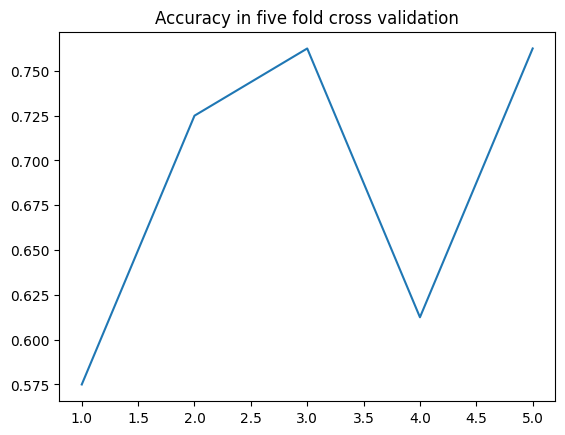

In [75]:
from sklearn.neural_network import MLPClassifier
Accuracy = []
model_mlp = MLPClassifier(hidden_layer_sizes=(900,6),activation='relu',solver='adam',random_state=89)
for i in range(5):
    model_mlp.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_mlp.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_mlp.predict(xtrains[test_indexes_per_split[i]]))))
    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_mlp.predict(xtrains[test_indexes_per_split[i]])))
print('Final Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()

In [76]:
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_mlp.predict(X_test))))

Accuracy in Test Data is 0.64


Accuracy value in training is 0.75625 and cross val 0 is 0.5625
Accuracy value in training is 0.753125 and cross val 1 is 0.4625
Accuracy value in training is 0.746875 and cross val 2 is 0.525
Accuracy value in training is 0.746875 and cross val 3 is 0.5375
Accuracy value in training is 0.709375 and cross val 4 is 0.525
Final Average Accuracy is 0.5225


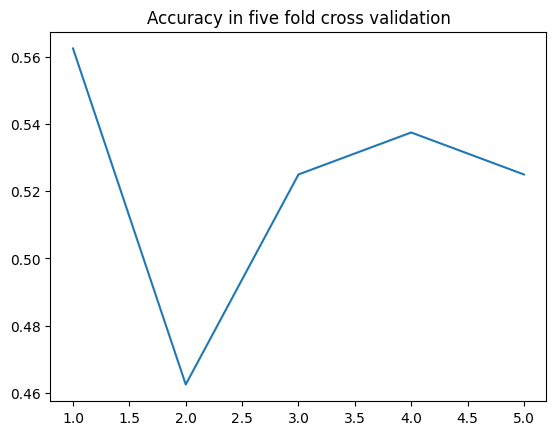

In [77]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbours = 3
Accuracy = []
for i in range(5):
    model_knn = KNeighborsClassifier(n_neighbours)
    model_knn.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_knn.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_knn.predict(xtrains[test_indexes_per_split[i]]))))
    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_knn.predict(xtrains[test_indexes_per_split[i]])))
print('Final Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()

In [78]:
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_knn.predict(X_test))))

Accuracy in Test Data is 0.46


#### Training Model Without Dependencies

In [79]:
X = data_merged[['Hqzip','Revchange','Industry encoded','Profits','Sector encoded']]
Y  = data_merged['Risk Of Investment']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,shuffle=True,test_size=0.2,random_state=113)
kfold = KFold(n_splits=5,shuffle=True,random_state=109)
splits = kfold.split(X_train,Y_train)


In [80]:
X_train

,Hqzip,Revchange,Industry encoded,Profits,Sector encoded
475,0.452289,0.249215,38,0.130489,6
476,0.464546,0.238226,54,0.154556,6
41,0.093342,0.189168,36,0.134525,6
146,0.093218,0.293564,50,0.205036,9
416,0.732325,0.206044,25,0.122362,16
...,...,...,...,...,...
364,0.175075,0.217818,67,0.155773,4
74,0.010424,0.214286,38,0.138497,6
162,0.203051,0.295918,31,0.134139,10
220,0.761402,0.223312,25,0.119119,16


In [81]:
train_indexes_per_split = []
test_indexes_per_split = []
for n,(train_index,test_index) in enumerate(splits):
    train_indexes_per_split.append(train_index)
    test_indexes_per_split.append(test_index)

In [82]:
xtrains = X_train.to_numpy()
ytrains = Y_train.to_numpy()

#### MODEL IMPLEMENTATION

In [83]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
metrics = [10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900]
best_avg_accuracy = []
for i  in range(len(metrics)):
    model_rfc = RandomForestClassifier(n_estimators = metrics[i],random_state = 193)
    model_rfc.fit(xtrains,ytrains)
    best_avg_accuracy.append(accuracy_score(ytrains,model_rfc.predict(xtrains)))
print('Best average Accuracy is {0} for the metrics {1}'.format(max(best_avg_accuracy),metrics[best_avg_accuracy.index(max(best_avg_accuracy))]))

Best average Accuracy is 1.0 for the metrics 40


Accuracy value in training is 1.0 and cross val 0 is 0.4625
Accuracy value in training is 1.0 and cross val 1 is 0.5
Accuracy value in training is 1.0 and cross val 2 is 0.45
Accuracy value in training is 1.0 and cross val 3 is 0.575
Accuracy value in training is 1.0 and cross val 4 is 0.525
Final Average Cross Val Accuracy is 0.5025000000000001


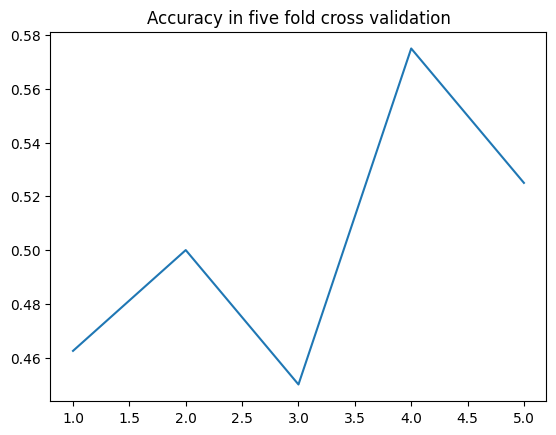

Accuracy in Test Data is 0.52


In [84]:
model_rfc = RandomForestClassifier(n_estimators = 40,random_state = 193)
Accuracy = []
for i in range(5):
    model_rfc.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_rfc.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_rfc.predict(xtrains[test_indexes_per_split[i]]))))
    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_rfc.predict(xtrains[test_indexes_per_split[i]])))
print('Final Average Cross Val Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_rfc.predict(X_test))))

In [85]:
from sklearn.svm import SVC
metrics = [1,2,3,4,5,6,7,8,9,10,11,12]
best_avg_accuracy = []
for i in range(len(metrics)):
    Accuracy = []
    model_svcl = SVC(kernel='linear',C=metrics[i])
    model_svcl.fit(xtrains,ytrains)
    best_avg_accuracy.append(accuracy_score(ytrains,model_svcl.predict(xtrains)))
print('Best average Accuracy is {0} for the metrics {1}'.format(max(best_avg_accuracy),metrics[best_avg_accuracy.index(max(best_avg_accuracy))]))

Best average Accuracy is 0.4475 for the metrics 1


Accuracy value in training is 0.45 and cross val 0 is 0.4375
Accuracy value in training is 0.45625 and cross val 1 is 0.4125
Accuracy value in training is 0.45625 and cross val 2 is 0.4125
Accuracy value in training is 0.434375 and cross val 3 is 0.5
Accuracy value in training is 0.440625 and cross val 4 is 0.475
Final Average Accuracy is 0.44749999999999995


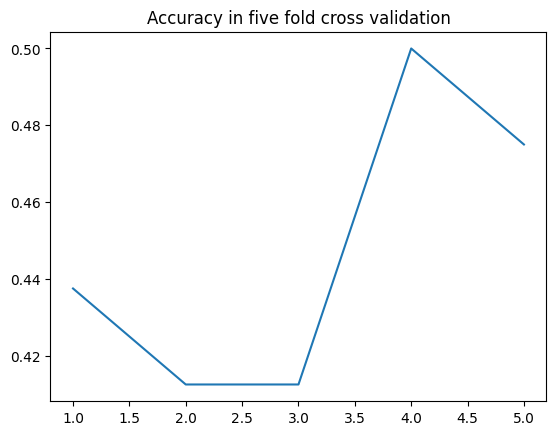

Accuracy in Test Data is 0.5


In [86]:
model_svcl = SVC(kernel='linear',C=metrics[best_avg_accuracy.index(max(best_avg_accuracy))])
Accuracy = []
for i in range(5):
    model_svcl.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_svcl.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_svcl.predict(xtrains[test_indexes_per_split[i]]))))
    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_svcl.predict(xtrains[test_indexes_per_split[i]])))
print('Final Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_svcl.predict(X_test))))

In [87]:
from sklearn.svm import SVC

metrics = [1,2,3,4,5,6,7,8,9,10,11,12]
metrics_tol = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.011,0.012]
best_avg_accuracy = []
Accuracy = []
for i in range(len(metrics)):
    model_rbf = SVC(kernel='rbf',C=metrics[i],tol=metrics_tol[i])
    model_rbf.fit(xtrains,ytrains)
    best_avg_accuracy.append(accuracy_score(ytrains,model_rbf.predict(xtrains)))
print('Best average Accuracy is {0} for the metrics {1}'.format(max(best_avg_accuracy),metrics[best_avg_accuracy.index(max(best_avg_accuracy))]))

Best average Accuracy is 0.455 for the metrics 11


Accuracy value in training is 0.4875 and cross val 0 is 0.425
Accuracy value in training is 0.46875 and cross val 1 is 0.425
Accuracy value in training is 0.45625 and cross val 2 is 0.4125
Accuracy value in training is 0.453125 and cross val 3 is 0.4875
Accuracy value in training is 0.440625 and cross val 4 is 0.5
Final Cross Val Average Accuracy is 0.45


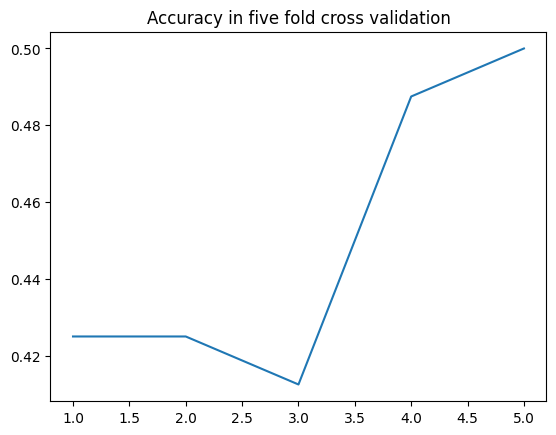

Accuracy in Test Data is 0.47


In [88]:
model_rbf = SVC(kernel='rbf',C=metrics[best_avg_accuracy.index(max(best_avg_accuracy))],
tol=metrics_tol[best_avg_accuracy.index(max(best_avg_accuracy))])

Accuracy = []
for i in range(5):
    model_rbf.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_rbf.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_rbf.predict(xtrains[test_indexes_per_split[i]]))))
    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_rbf.predict(xtrains[test_indexes_per_split[i]])))
print('Final Cross Val Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()

print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_rbf.predict(X_test))))

In [89]:
from sklearn.tree import DecisionTreeClassifier
metrics = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
best_avg_accuracy = []
for i in range(len(metrics)):
    Accuracy = []
    model_dtc = DecisionTreeClassifier(max_depth=metrics[i])
    model_dtc.fit(xtrains,ytrains)
    best_avg_accuracy.append(accuracy_score(ytrains,model_dtc.predict(xtrains)))
print('Best average Accuracy is {0} for the metrics {1}'.format(max(best_avg_accuracy),metrics[best_avg_accuracy.index(max(best_avg_accuracy))]))

Best average Accuracy is 1.0 for the metrics 18


Accuracy value in training is 0.671875 and cross val 0 is 0.35
Accuracy value in training is 0.7 and cross val 1 is 0.4375
Accuracy value in training is 0.65625 and cross val 2 is 0.575
Accuracy value in training is 0.64375 and cross val 3 is 0.6125
Accuracy value in training is 0.65 and cross val 4 is 0.5125
Final Training Average Accuracy is 0.49749999999999994


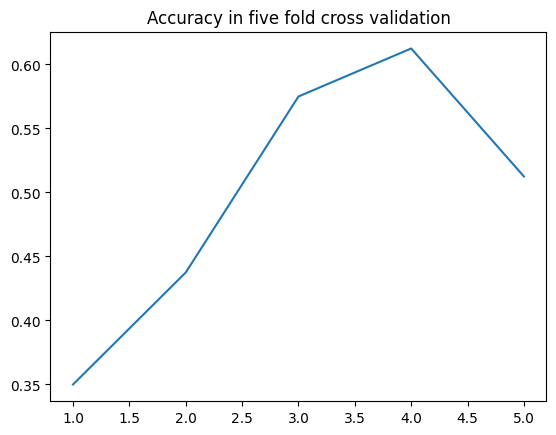

Accuracy in Test Data is 0.59


In [90]:
model_dtc = DecisionTreeClassifier(max_depth=5)
Accuracy = []
for i in range(5):
    model_dtc.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_dtc.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_dtc.predict(xtrains[test_indexes_per_split[i]]))))

    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_dtc.predict(xtrains[test_indexes_per_split[i]])))
print('Final Training Average Accuracy is {0}'.format(sum(Accuracy)/5))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_dtc.predict(X_test))))

Accuracy value in training is 0.496875 and cross val 0 is 0.425
Accuracy value in training is 0.471875 and cross val 1 is 0.3375
Accuracy value in training is 0.425 and cross val 2 is 0.375
Accuracy value in training is 0.4625 and cross val 3 is 0.475
Accuracy value in training is 0.484375 and cross val 4 is 0.4875
Final Cross Val Average Accuracy is 0.41999999999999993


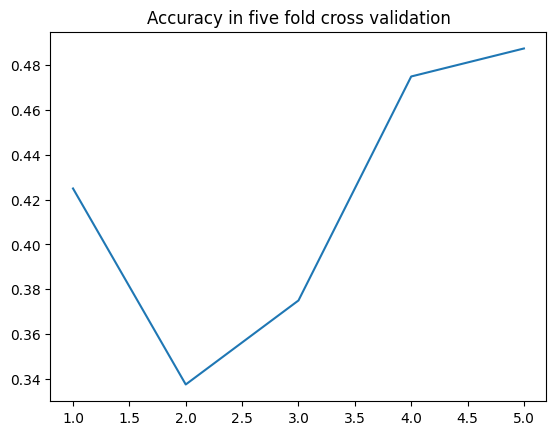

In [107]:
from sklearn.neural_network import MLPClassifier
Accuracy = []
model_mlp = MLPClassifier(hidden_layer_sizes=(900,8),activation='tanh',solver='sgd',random_state=195)
for i in range(5):
    model_mlp.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    model_mlp.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_mlp.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_mlp.predict(xtrains[test_indexes_per_split[i]]))))

    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_mlp.predict(xtrains[test_indexes_per_split[i]])))
print('Final Cross Val Average Accuracy is {0}'.format(sum(Accuracy)/5))
best_avg_accuracy.append(sum(Accuracy)/5)
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()


In [108]:
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_mlp.predict(X_test))))
    

Accuracy in Test Data is 0.47


In [93]:
from sklearn.neighbors import KNeighborsClassifier
metrics = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
best_avg_accuracy = []
for i in range(len(metrics)):
    model_knn = KNeighborsClassifier(metrics[i])
    model_knn.fit(xtrains, ytrains)
    best_avg_accuracy.append(accuracy_score(ytrains,model_knn.predict(xtrains)))
print('Best average Accuracy is {0} for the metrics {1}'.format(max(best_avg_accuracy),metrics[best_avg_accuracy.index(max(best_avg_accuracy))]))

Best average Accuracy is 0.675 for the metrics 4


Accuracy value in training is 0.678125 and cross val 0 is 0.4375
Accuracy value in training is 0.6875 and cross val 1 is 0.5375
Accuracy value in training is 0.66875 and cross val 2 is 0.5125
Accuracy value in training is 0.6875 and cross val 3 is 0.5375
Accuracy value in training is 0.68125 and cross val 4 is 0.5875


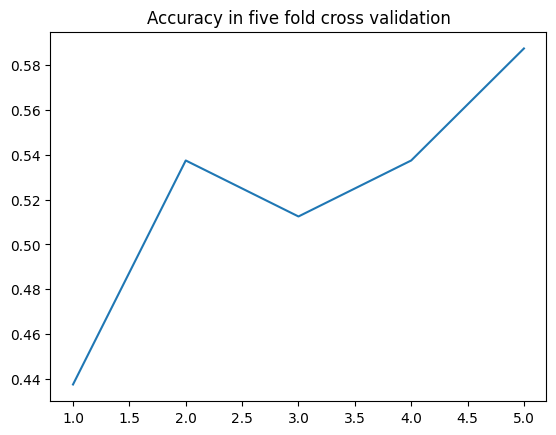

Accuracy in Test Data is 0.52


In [94]:
model_knn=KNeighborsClassifier(4)
Accuracy = []
for i in range(5):
    model_knn.fit(xtrains[train_indexes_per_split[i]],ytrains[train_indexes_per_split[i]])
    print('Accuracy value in training is {0} and cross val {1} is {2}'.format(accuracy_score(ytrains[train_indexes_per_split[i]],
    model_knn.predict(xtrains[train_indexes_per_split[i]])),i,accuracy_score(ytrains[test_indexes_per_split[i]],
    model_knn.predict(xtrains[test_indexes_per_split[i]]))))

    Accuracy.append(accuracy_score(ytrains[test_indexes_per_split[i]],
    model_knn.predict(xtrains[test_indexes_per_split[i]])))
plt.figure()
plt.title('Accuracy in five fold cross validation')
plt.plot([1,2,3,4,5],Accuracy)
plt.show()
print('Accuracy in Test Data is {0}'.format(accuracy_score(Y_test,
    model_knn.predict(X_test))))

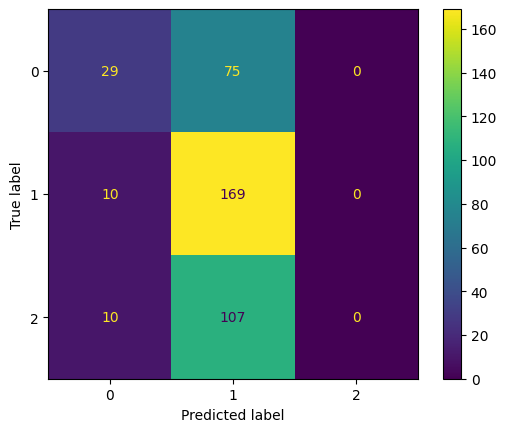

In [95]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_mlp,xtrains,ytrains)
plt.show()

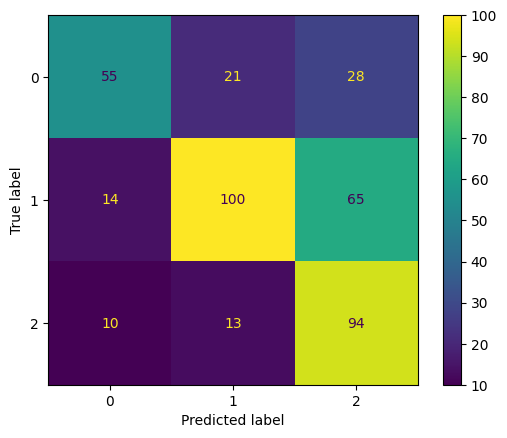

In [96]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_dtc,xtrains,ytrains)
plt.show()

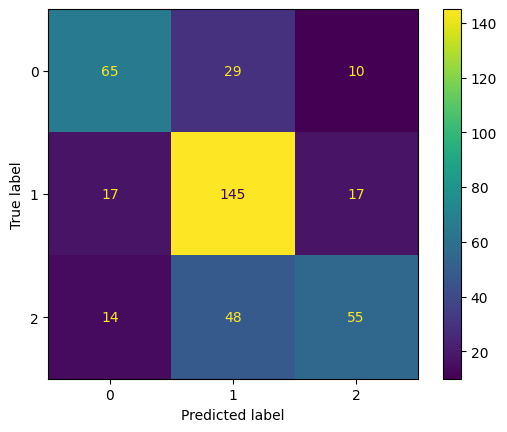

In [97]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_knn,xtrains,ytrains)
plt.show()

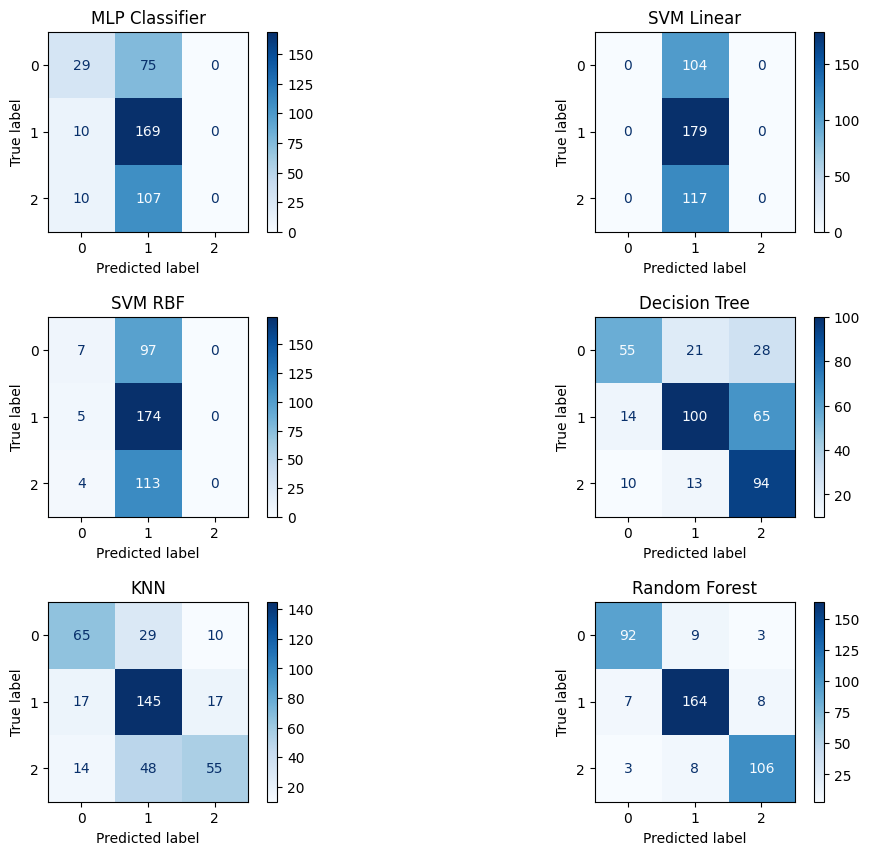

In [98]:
fig,axes = plt.subplots(nrows = 3,ncols =2,figsize =(12,10))
fig.subplots_adjust(hspace=0.425, wspace=0.425)
plot_confusion_matrix(model_mlp,xtrains,ytrains,cmap ='Blues',ax=axes[0,0])
axes[0,0].title.set_text('MLP Classifier')
plot_confusion_matrix(model_svcl,xtrains,ytrains,cmap ='Blues',ax=axes[0,1])
axes[0,1].title.set_text('SVM Linear')
plot_confusion_matrix(model_rbf,xtrains,ytrains,cmap ='Blues',ax=axes[1,0])
axes[1,0].title.set_text('SVM RBF')
plot_confusion_matrix(model_dtc,xtrains,ytrains,cmap ='Blues',ax=axes[1,1])
axes[1,1].title.set_text('Decision Tree')
plot_confusion_matrix(model_knn,xtrains,ytrains,cmap ='Blues',ax=axes[2,0])
axes[2,0].title.set_text('KNN')
plot_confusion_matrix(model_rfc,xtrains,ytrains,cmap ='Blues',ax=axes[2,1])
axes[2,1].title.set_text('Random Forest')


